<a href="https://colab.research.google.com/github/nickv779/LADS-Notebooks/blob/main/Nicolas_Valiente_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lin. Alg. for Data Science, Fall 25
# Homework 3 (The Majestic Mosaic)

> Before you get terrified: It looks like a lot but it boils down to 15 lines of code for all tasks. I ask you to write it in a nice way, so it will be a little more + comments.


## Due date: see discord/canvas

- Collaboration rules:
For this task, **feel free to discuss any details on discord**, share outputs etc. I'm just asking you to refrain from posting code (working or otherwise). But you can describe the code in words. I just don't want people to blindly copy paste someone else's solution.

- Instructions:
You know the drill.

## LLM usage
Many of you use ChatGPT etc for reformatting the code. Don't use it here, since I want to you use a tool which will guide you through improving the quality of your code. If you just use ChatGPT, you'll not know what constitutes good python coding style...

At the very least you want to be able to write well-formatted python at your in-person job interview...

# The mosaic (IMPORTANT)

The idea is to take an image -- and replace **each pixel** with a small image. The result will resemble a mosaic made of small colorful tiles. The image below shows a close-up of one such mosaic.

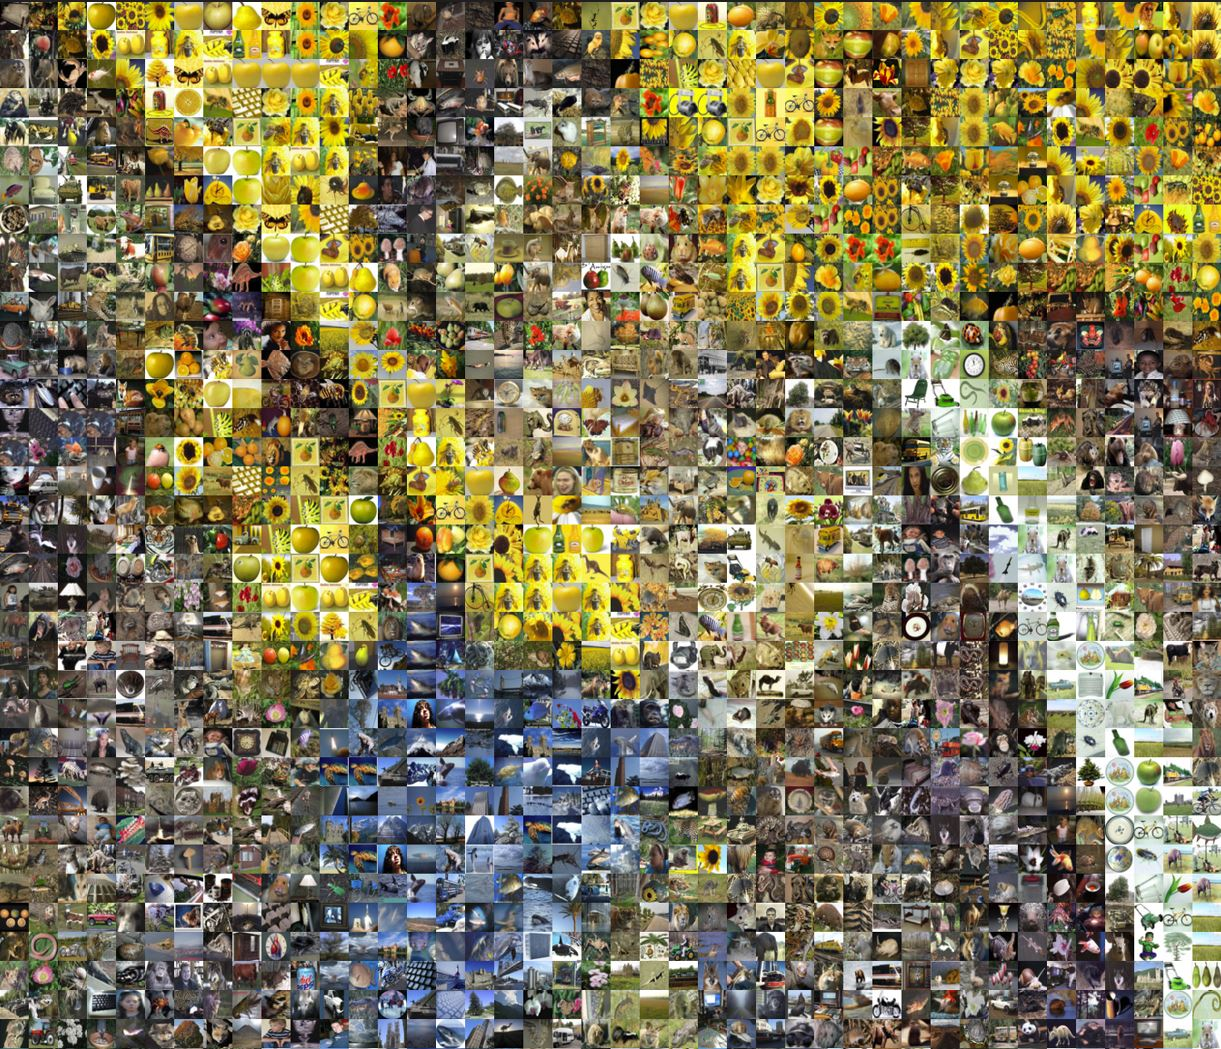

# Proposed algorithm
From a computational perspective, this is a hard task!
We will use an image with $P$ = ~200'000 pixels in an image. But it could easily be millions or even billions of pixels.

And for each pixel we will have to find a matching image. We will use cifar100 for the tiles, so that $T$ = 50'000 images. But it could easily be millions of images!

So a naive algorithm would have complexity $\Omega(PT)$ -- it's already terrible, but we haven't even considered that the tiles can be fairly large.

> You can try to brute-force it tell us how long it took.

**What to do, what to do!?**

First, by **input image** I mean the single large-ish image we want to turn into a mosaic. By a tile I mean each of the many small images which will be the tiles of the resulting mosaic.

In our example the input is 512x512 and the tiles are 32x32. Both are RGB images.

Now, we will do a couple of tricks:
- To find the matching tile, we will consider its mean color and compare it with the pixel which it's meant to replace. We just reduced the dimensionality of our data from $32*32*3$ to $3$. And it makes sense here!

> It's useful to think of these RGB vectors as *fingerprints* of the images. They contain only the crucial data (in this case mean color), but make the search process much easier.

- Since now our data is now 3-dimensional, we can just use kd-trees to look for nearest neighbours!

> You should remember from our notebook that kd-trees are super efficient for low dimensions, but their performance tends to degrade around d=100.

- So we will build a kd-tree on top of the mean-colors of tiles and query for each pixel in the input image.

> Note that a single query returns an index of the nearest mean-color -- but that's also the index of the tile we want!

- So now we have an index of a tile for each pixel in the input image.

- The last step is to convery these indices to the final image -- that's just (no so) basic numpy.

# Code quality (IMPORTANT!)

In this assigment we'll focus on code quality much more than before.

> If your programming experience is limited, don't stress out too much. Ask questions on discord if needed, and try to do your best. Once we're done, we'll share some good solutions, so that you can see what should have been done. In terms of scoring, I will try to look more at effort than results.

## Code quality -- overview

In this task we'd like to focus on **code quality**. Imagine your implementation will be used by some other people, maybe in the company you work for. So we focus on code quality.

I highlight some aspects of code quality in this document. If you have questions -- ask publically on discord.

So the focus is not on the implementation/code itself. If you're having issues -- just ask publically on discord. Just don't share code, but try to describe your problem. You can share error messages -- but make sure it does not include your code.

This simulates a typical situation in which the focus is on high quality code -- but you have more experienced teammates who can help you solve your problem quickly. So it's counterproductive to spend too much time on a problem.

## Design

Try to think about organizing your code in a logical way. This can  increade code's readability and flexibility.

Some tips:
* Make sure your function names, variables etc have descriptive names.
* If you think some computation you do can be resused (maybe in another context), create a function from it, add comments.
* Ideally someone should get the gist of what's hapenning without looking at the actual implementations.
* Here, you should have some well-named function for each of the parts.
* If a function gets complicated you can split it in multiple functions.
* Make sure your implementation not a one-trick-pony -- it should work with other inputs as well. Try it on some other dataset.
* Don't assume the data will always have the same size, type etc.
* If you make an assumption (e.g. input is an RGB image use an assert. Like assert len(image.shape)==3
assert image.shape[-1]==3 # or something like that



## Comments

The algorithm we're using is simple buy quite intricate. Make sure to add nicely formatted comments to each function. Document any assumptions you have about the input, limitations etc. You can have a look at how numpy function do it.

> Also, don't just copy paste my original descriptions to the comments!

If you use any tricks which may not be obvious -- make sure they are well documented and an average python programmer could understand it. Otherwise, consider a more straightforward approach.



## Testing

Try to come up with some simple automated tests. Use the pytest library or asserts.

Remember to use simple tests to which the answer is obvious to you.


Cook up a simple, say, 2x2 image and a couple of simple 2x2 tiles (one mostly red, one mostly blue etc) and compute the result 'by hand'. The test should compare your result with the ouput of your implementation.

> Here it's going to be a little annoying, but writing tests a good habit to develop (even if it's tedious). And you'll have to make sure you understand the input and the algorithm -- because you'll have to do this kind of by hand.

> BTW. Some people insist that automated tests should be written before implementation. It's called TDD (https://en.wikipedia.org/wiki/Test-driven_development). Noone really does that -- but writing tests as soon as possible is definitely a good idea. Untested code is a serious liability, especially if you change it (and you will, eventually).


## Python coding standard

Python has a coding standard, namely a specific way python code shoud be formatted etc.

See here: https://peps.python.org/pep-0008/

You don't really need to parse this document, we'll use a tool to analyze our code and tell us what's wrong.

Any professional codebase adhers to a coding standard. Contrary to what many beginners think, it is of crucial importance. In the long run unreadable code (as well as untested code) is more of a liability than an asset.

## Tool for checking code quality (USE IT!)

We will use the flake8 code quality analyzer. Such tooks are often called 'linters'. The idea is that code gathers lint as you develop and change it -- this tool helps remove the excess lint.

> The first such tool was developed in the 70s, go figure.

It will report any deviations for the accepted python coding standards. You should strive to remove all its complaints

> Exception: "W391 blank line at end of file" which seems to be impossible to get rid of in colab

Make sure the cell below is run -- it installs the analyzer so that it can be used later.

> Please avoid using type annotations -- they're nice but it seems this tool doesn't understand them :(

In [1]:
# make sure you include this in your final notebook!
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

## Usage examples

In [3]:
%%pycodestyle
# bad code with many complaints

def f(a , b):

    return  a +  b
a = f( 4, 6 )

4:8: E203 whitespace before ','
6:11: E271 multiple spaces after keyword
6:16: E222 multiple spaces after operator
7:1: E305 expected 2 blank lines after class or function definition, found 0
7:7: E201 whitespace after '('
7:12: E202 whitespace before ')'
8:1: W391 blank line at end of file


In [6]:
%%pycodestyle
# better code without real complaints. Note the 2 empty lines after f.

def f(a, b):
    return a + b


a = f(4, 6)

9:1: W391 blank line at end of file


The first line above triggers the code analysis tool. Once you're done with the implementation make sure you run this cell with the code analyzer on (%%pycodestyle has to be the first line and cannot be commented)

> INFO:pycodestyle:10:1: W391 blank line at end of file

This is okay, we can't really get rid of this warning in colab...


## Warning:
> Note that when you run the cell with the code analyzer on, **the code is actually not run**. In particular any tests/asserts you add there will not signal errors! So to actually run the code you need to comment the first line (turn off the code analyzer)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from keras.datasets import cifar100 as tiles_dataset

# Used by some code I wrote for you
from PIL import Image
import urllib.request

2025-10-20 06:12:43.288477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 06:12:43.967418: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 06:12:45.904942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


# Data loading

In [3]:
def get_image(img_URL, w):
  '''Just downloads an image, resizes to size w x w and
    returns it as an np.array.
    Note that no normalization is performed.
  '''
  file_name = 'input_image_name_on_disk'
  urllib.request.urlretrieve(img_URL, file_name)
  im = Image.open(file_name)
  im = im.resize((w, w))
  return np.asarray(im)[..., :3] # removes a potential alpha channel

In [4]:
img_UF_URL = "http://people.clas.ufl.edu/hwagner/files/UF.png"
img_ravenna_URL = "http://people.clas.ufl.edu/hwagner/files/ravenna.jpg"


# Feel free to use another url for fun; it must point directly at an image file
mos = get_image(img_UF_URL, w=512)

# mos = Image.open(img_selfie_URL)

In [5]:
tiles = tiles_dataset.load_data()[0][0]

# Task 1: the proof-of-concept
First, compute the mean colors of all the tiles and construct a kd-tree.

Now generate 10 random colors and query the kd-tree for the nearest neighbours. For each of the 10 colors, imshow (in a horizontal row): the original color, the nearest mean color and the tile corresponding to the mean color.

> The results should make sense. Keep in mind that we're talking about the mean color. So something red on a which background will be pink on average!

# Some things to watch out for:

> This could be some preemptive tips from a more experienced teammate, who solved similar problems

- Do *not* normalize the tiles, by dividing by 255. Keep the values as integers between 0 and 255. Note after loading cifar100 numpy represent each RGB intensity as a np.uint8 type. It only needs 1 byte of memory. The default floating point value (np.float64) uses 8 bytes (64 bits). Normally it's not an issue, but we will generate very large images -- so if we use floats memory will likely blow up.

- The means can be stored as floats -- they don't take up too much space, and you get imprecisions otherwise. So they should be *floats* between 0 and 255.

- You can imshow a single color (RGB vector) by reshaping it into a vector with shape (1,1,3).

- Remember you can create a larger figure, e.g. plt.figure(figsize=(20, 20))

- The hardest part is re-arranging the tiles in the correct order. It's not a simple reshape. The easy way of doing it, is to create a large empty np.array representing the ouput image -- and 'paste' each tile in the appropriate place in it. Remebmer about the fancy indexing like: output[32:64, 64:96] = some_tile.

- Don't use np.transpose and similar tricks -- unless you're confident you could explain it to someone (perhaps in a slightly different scenario).

- Overall, the main algorthm can be done in 5 lines of code with no explicit loops. But not using loops may actually hurt the readability, so it's not required or encouraged.

- You can save the resulting nparray as an '.png' or '.jpg' image like this: Image.fromarray(result).save('out.png')

> The png version will be compressed losslessly and will look much better than jpg -- but the file may be huge! You can then download it and zoom in on your compute as I did in class (if we had time...). The jpg will be smaller but may look really bad.

> If you did everything perfectly, the computations should take maybe 5 seconds -- except for downloading the data and saving the huge image. So by default I wouldn't save it -- only if I really want to download it. BTW. Colab's local files are accessible in the tab to the left (at least normally).

In [6]:
mean_tiles = np.mean(tiles, axis=(1, 2))
random_colors = np.random.randint(255, size=(10, 3))

In [7]:
tree = KDTree(mean_tiles)

In [8]:
inds = tree.query(random_colors, return_distance=False)

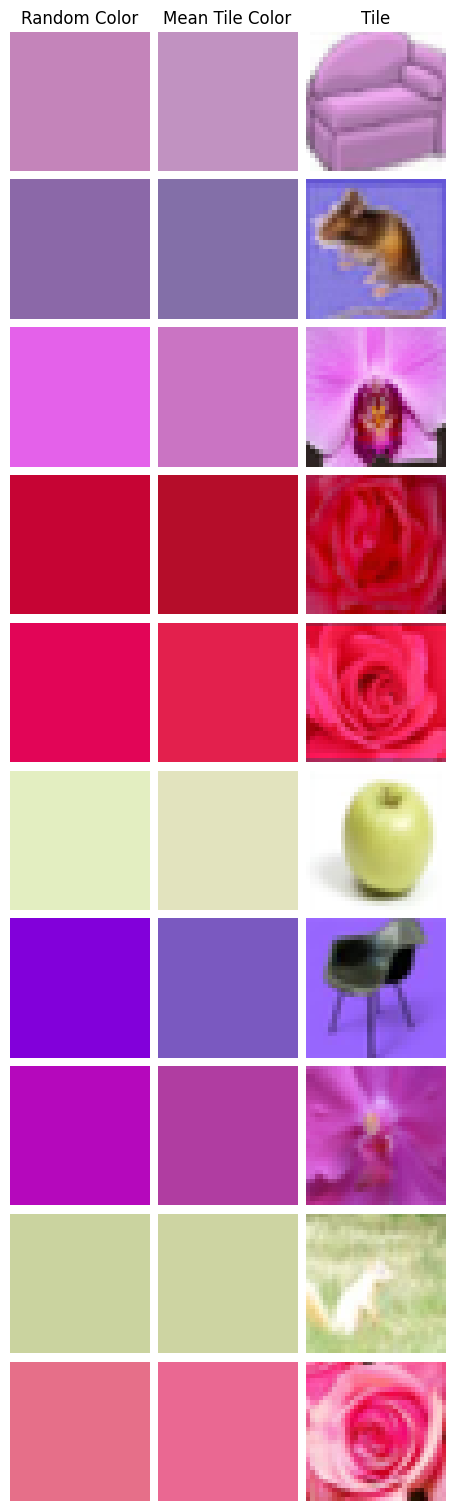

In [24]:
figs, axs = plt.subplots(nrows=10, ncols=3, figsize=(10, 15), layout='compressed')
axs[0][0].set_title('Random Color')
axs[0][1].set_title('Mean Tile Color')
axs[0][2].set_title('Tile')
for i, ind in enumerate(inds):
    axs[i][0].imshow(np.dstack(random_colors[i]))
    axs[i][0].axis('off')
    axs[i][1].imshow(np.dstack(mean_tiles[ind].reshape(-1).astype(int)))
    axs[i][1].axis('off')
    axs[i][2].imshow(tiles[ind][0])
    axs[i][2].axis('off')
plt.show()

# Task 2.0: draft of the implementation



If everything looks good in task 1, we are ready for the full algorithm. Good luck!

Please leave your initial implementation (before applying the linter and anything else). This should be your original code.

In [26]:
mos.shape

(512, 512, 3)

# Task 2.1: The full-fledged implementation

Now take care of performance, code-quality, etc.


For full credit the computations (without displaying or saving) ought to take around 6 seconds or less!

> Make sure to follow the code-quality guidelines!



# Task 3: Validation

Imshow the portion of the ouput image (numpy array) which corresponds to the top-left 8x8 tiles.

> Not talking about the 8x8 pixels!

Below I'm showing the correct image. If you look at your output and my output and the results are identical -- well done! In particular, all tiles should show the same thing.

> If you get something different here, you may have used some slight variation of the algorithm. Try to get exactly the same results, it's hard to grade otherwise.

# Mini task 4:
Save the file to a .png and download on your disk. You can then open it in a photo viewer and zoom in and appreciate the result as we did in class. You can also run it on another example if you want.

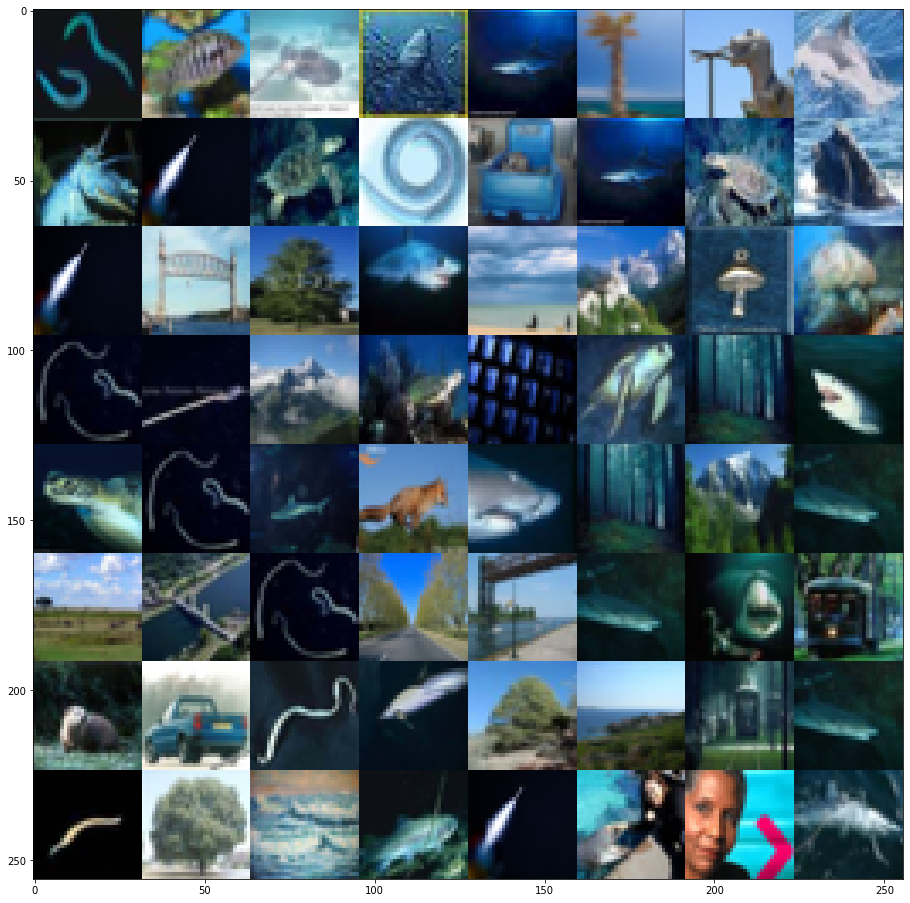

# Mini Task 5: One last thing...

Uncomment and run the code below after assigning
your final large mosaic to the variable X. You'll get a value which I'll ask you about in the form.

In [ ]:
import hashlib

In [ ]:
# X = your_final_large_mosaic_as_np_array
# h = hashlib.sha256(X.tobytes(order="C")).hexdigest()

# Bonus [some extra credit, could be a lot if you do something interesting]:
Try to improve this method. If you managed to do someting interesting -- show how the versions compare. Maybe plot the same portions of the mosaic side by side?

- One shortcoming is that we will often get patches of similar images -- can we do something about this in an elegant way? Can you implement this version and compare the results?

- Maybe just taking the mean color is not what we really want? I mean the idea is that the derived color kind of corresponds to how we percieve a tile from afar. Can you propose and test and alternative approach?

- Maybe taking the means loses too much information. Can you try a more fine-grained fingerprint?

- Maybe using the Euclidean distance is not the best way to compare colors? Can you try out some variation?

> An extreme version of this problem is an 'infinite zoom' version done in real-time. So as you keep zooming in the pixels of the tiles would be revealed to be images -- and you could zoom in like that forever. I've never impleented this, but I suspect it's actually feasibly on moderns GPU (similar data-structures are used for raytracing). Maybe some of you have  thoughts on this.